# CSME2 Bonus Point Assignment 1

<div style="text-align: right;font-size: 0.8em">Document Version 1.0.0, released 01/12/2021</div>
For detailed task instructions, please refer to the assignment PDF.

DO NOT CLEAR THE OUTPUT of the notebook you are submitting!

In [22]:
# Add any additional import you need in this cell
import numpy as np
from sklearn.cluster import kmeans_plusplus, KMeans
import os
from scipy.io import loadmat
import math
from matplotlib import pyplot as plt
from random import seed
from random import random
from numpy.random import default_rng
import pandas as pd

np.random.seed(1234)

### Setup
__Task A.1__ Load the data into the following numpy arrays. For the output, only use the first torque variable.
Randomly split the data from the file ```sarcos_inv.mat``` into a training set (80%) and a validation set (20%).

In [2]:
path = os.getcwd()

data = loadmat(path + '/data/sarcos_inv.mat')
test_data = loadmat(path + '/data/sarcos_inv_test.mat')

data_array = data['sarcos_inv']
test_data_array = test_data['sarcos_inv_test']



In [3]:
# Randomly splits the data into train and validation data
def split_data(array, percentage_train): # percentage_train defined as float
    np.random.shuffle(array)
    train, validation = array[:math.floor(array.shape[0] * percentage_train) ,:], array[math.floor(array.shape[0] * percentage_train):,:]
    return train, validation

In [4]:
# Input and output training data
train, validation = split_data(data_array, 0.8)

input_data = data_array[:, :21]
output_data = data_array[:, 21:22]

xs_train = train[:, :21]
ys_train = train[:, 21:22]

# Input and output validation data
xs_valid = validation[:, :21]
ys_valid = validation[:, 21:22]

# Input and output test data
xs_test = test_data_array[:, :21]
ys_test = test_data_array[:, 21:22]

In [5]:
# Check for yourself 
# The following should lead to output 
# (44484, 21)
# (44484, 1)
# (8897, 21)
# (8897, 1)
# (4449, 21)
# (4449, 1)
print(xs_train.shape)
print(ys_train.shape)
print(xs_valid.shape)
print(ys_valid.shape)
print(xs_test.shape)
print(ys_test.shape)

(35587, 21)
(35587, 1)
(8897, 21)
(8897, 1)
(4449, 21)
(4449, 1)


##### Manually defining function for mean, std and sum

In [6]:
#sum formular for arrays as input and total sum as output
def sum_array_total(xs):
    sum_temp = 0
    sum_temp2 = 0
    
    for i in xs:
        sum_temp2 += i
    
    for j in sum_temp2:
        sum_temp += j
        
    return sum_temp

In [7]:
#sum formular for arrays as input and column sum as output
def sum_array_column(xs):
    sum_temp = 0
    
    for i in xs:
        sum_temp += i
        
    return sum_temp

In [8]:
# manual calculation of the mean
def mean_manual(xs):
    mean_array = sum_array_total(xs)/xs.size
    return mean_array  

In [9]:
# manual calculation of the std
def std_manual(xs):
    mean = mean_manual(xs)
    amount = xs.size
    std = math.sqrt(sum_array_total((xs-mean)**2)/amount)
    return std

__Task A.2__ Standardize the data such that
1. Training inputs have mean 0
2. Each training input variable has variance 1
3. The training outputs have mean 0
4. Apply the same transformation to the validation and test data

Implement this manually, i.e., do not use a ready scaler like the one provided by scikit-learn.

In [10]:
# Calculate the mean and std of the training data
input_mean = sum_array_column(xs_test)/xs_test.shape[0]
input_std = np.sqrt((sum_array_column((xs_train - sum_array_column(xs_train)/xs_train.shape[0])**2))/xs_train.shape[0])
output_mean = sum_array_column(ys_train)/ys_train.shape[0]

# Store the standardized data in the following variables
xs_train_std = (xs_train - input_mean)/input_std
ys_train_std = ys_train - output_mean

xs_valid_std = (xs_valid - input_mean)/input_std
ys_valid_std = ys_valid - output_mean

xs_test_std = (xs_test - input_mean)/input_std
ys_test_std = ys_test - output_mean

In [11]:
# Check for yourself
# The following should lead to (roughly) six zeros and three arrays with (approximately) ones
print(np.mean(xs_train_std))
print(np.mean(ys_train_std))
print(np.mean(xs_valid_std))
print(np.mean(ys_valid_std))
print(np.mean(xs_test_std))
print(np.mean(ys_test_std))

print(np.var(xs_train_std, axis=0))
print(np.var(xs_valid_std, axis=0))
print(np.var(xs_test_std, axis=0))

0.0015470586122090751
4.573413799484798e-14
-0.0016261531408336494
0.19872240379652337
4.881943996540713e-16
0.07801142839814729
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.99941944 0.99560469 0.99031795 1.00475838 0.98202453 0.99057856
 0.98962848 1.04329953 0.98648227 1.01507856 1.01233076 0.97888543
 0.99605626 1.01274888 1.04355923 1.0075977  1.01756782 1.00041788
 0.9999016  1.01836687 1.01063379]
[0.9998744  0.99869108 0.99799683 0.99987941 0.99726481 0.99929238
 0.99628287 1.01155323 1.00516321 1.00175004 1.00261741 0.99621362
 0.99665721 1.00328967 1.00272614 0.98505808 1.02386997 1.00787492
 1.0053608  1.00520189 1.00324081]


__Task A.3__

In [12]:
# Task A.3.a
# Implement a function estimating the variance
def my_variance(xs):
    """Calculate the empirical variance of a given vector of scalars
    
    Arguments
    xs      1d numpy array
    
    Returns
    The empirical variance of the provided vector
    """
    mean = sum_array_total(xs)/xs.shape[0]
    variance = sum_array_total((xs-mean_manual(xs))**2)/xs.shape[0]
    return variance


In [13]:
# Task A.3.b
# Calculate the variance of ys_train_std using your function my_variance
var_ys_train = my_variance(ys_train_std)
var_ys_train

413.45411781843603

In [14]:
# Task A.3.c
# Implement a function calculating the SMSE between two 1d numpy arrays given a normalizing factor
def my_smse(z1, z2, s):
    """Calculate the Standardized Mean Squared Error (SMSE)
    
    Arguments
    z1      1d numpy array (usually the predictions)
    z2      1d numpy array (usually the test data)
    s       Normalization factor (usually the variance of the test data)
    
    Returns
    The SMSE of the provided data
    """
    # Your implementation
    calc_sum = sum_array_total((z1-z2)**2) # substracts the arrays form each other, squares them and then sums up the values 
    smse = 1/(z1.shape[0] * s) * calc_sum
    return smse

## Linear regression
### Simple linear regression
__Task A.4__

In [15]:
# This variable should contain the weights corresponding to simple linear regression (LS criterion, no bias term)

vector = np.ones(xs_train_std.shape[0]) # creates vector only containing ones 
phi = np.c_[vector, xs_train_std] # creates the basis function 
w_lr = np.linalg.inv(phi.T @ phi) @ phi.T @ ys_train_std

# This variable should contain the predictions using w_lr on the test data
vector2 = np.ones(xs_valid_std.shape[0]) # creates vector only containing ones matching the size of xs_valid_std
phi_valid = np.c_[vector2, xs_valid_std]
ys_pred_valid = phi_valid @ w_lr.reshape([-1,1])

# This should contain the resulting smse
smse_lr = my_smse(ys_pred_valid, ys_valid_std, var_ys_train)
smse_lr

0.07535841224617781

### Linear regression with polynomial features
__Task A.5__

In [16]:
def my_poly_features_1d(xs, degree):
    copy = xs.copy() #creates copy of array
    temp1 = xs 
    index = list(range(xs.shape[0])) #creates index as list from 0 to amount of rows-1 

    for d in range(1, degree):
        temp2 = []
        for i, j in enumerate(xs): #indexing of the array
            index2 = len(temp2) # new index counting the elements in temp2
            for a in temp1[index[i]:]: #iterating over array
                temp2.append(j*a)
            index[i] = index2
        copy = np.append(copy, temp2) #adds the calucation to the array
        temp1 = temp2

    copy = np.insert(copy, 0, 1) #adds column only containing ones at the begining of the array

    return copy

In [17]:
# Task A.5.a
def my_poly_features(xs, degree):
    """Generates polynomial features from given data
    
    The polynomial features should include monomials (i.e., x_i, x_i**2 etc)
    and interaction terms (x_1*x_2 etc), but no repetitions.
    The order of the samples should not be changed through the transformation.
    
    Arguments
    xs      2d numpy array of shape (N,D) containing N samples of dimension D
    degree  Maximum degree of polynomials to be considered
    
    Returns
    An (N,M) numpy array containing the transformed input
    """
    # Your implementation
    temp = np.array([my_poly_features_1d(row, degree) for row in xs]) #uses function that is only able to take 1d as input on 2d array
    return temp

In [18]:
# Tasks A.5.b
# This variable should contain the weights corresponding to linear regression using polynomial features up to degree 2 and 3
phi_2 = my_poly_features(xs_train_std, 2)
phi_3 = my_poly_features(xs_train_std, 3)

w_poly2 = np.linalg.inv(phi_2.T @ phi_2) @ phi_2.T @ ys_train_std
w_poly3 = np.linalg.inv(phi_3.T @ phi_3) @ phi_3.T @ ys_train_std

# This variable should contain the predictions using w_poly2 and w_poly3 on the validation data
ys_pred_poly2_valid = my_poly_features(xs_valid_std, 2) @ w_poly2.T.reshape([-1,1])
ys_pred_poly3_valid = my_poly_features(xs_valid_std, 3) @ w_poly3.T.reshape([-1,1])

# This should contain the resulting smse
smse_poly2 = my_smse(ys_pred_poly2_valid, ys_valid_std, var_ys_train)
smse_poly3 = my_smse(ys_pred_poly3_valid, ys_valid_std, var_ys_train)

In [19]:
print('smse_poly2:', smse_poly2, 'smse_poly3:', smse_poly3)

smse_poly2: 0.034328459165135154 smse_poly3: 0.016167476998437787


## Clustering
__Task B.1__ Implement the basic $K$-Means algorithm.

In [20]:
def my_kmeans(xs, init_centers, n_iter):
    """Runs the K-Means algorithm from a given initialization
    
    Arguments
    xs            2d numpy array of shape (N,D) containing N samples of dimension D
    init_centers  2d numpy array of shape (K,D) containing the initial cluster centers
    n_iter        Number of iterations of the K-Means algorithm
    
    Returns
    An (K,D) numpy array containing the final cluster centers
    """
    # Your implementation
    centers = init_centers
    K = len(init_centers)
    for i in range(n_iter):
        distances = np.array([]).reshape(len(xs),0)
        for k in range(K): 
            distances = np.column_stack((distances,np.sqrt(np.sum((xs-centers[k])**2,axis=1))))
        min_centers = np.argmin(distances,axis=1)
        centers_distances = {}
        for k in range(K):
            center_distances = np.array([]).reshape(2,0)
            for n in range(len(min_centers)):
                if k == min_centers[n]:
                    center_distances = np.column_stack((center_distances, xs[n]))
            centers_distances[k]=center_distances
            centers_distances[k]=centers_distances[k].T
            centers[k] = np.mean(centers_distances[k], axis=0)
    return centers
        
    pass

__Task B.2__ Generate test data set and plot it.

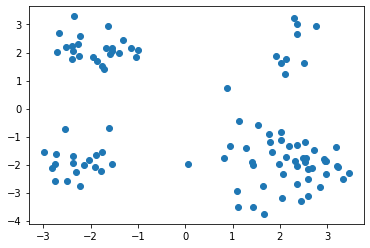

In [23]:
xs_cluster_test = np.zeros((100,2))
random = np.random.rand(100,1)
rng = np.random.default_rng(1234)

for i in range(len(random)):
    if random[i] < 0.3:
        xs_cluster_test[i] = rng.multivariate_normal((-2,2), np.multiply(0.2, np.identity(2)), size=None, check_valid='warn', tol=1e-8)
        continue
    elif random[i] < 0.5:
        xs_cluster_test[i] = rng.multivariate_normal((-2,-2), np.multiply(0.2, np.identity(2)), size=None, check_valid='warn', tol=1e-8)
        continue
    elif random[i] < 0.9:
        xs_cluster_test[i] = rng.multivariate_normal((2,-2), np.multiply(0.5, np.identity(2)), size=None, check_valid='warn', tol=1e-8)
        continue
    else:
        xs_cluster_test[i] = rng.multivariate_normal((2,2), np.multiply(0.5, np.identity(2)), size=None, check_valid='warn', tol=1e-8)

plt.scatter(xs_cluster_test[:,0],xs_cluster_test[:,1])

__Task B.3__ Run your $K$-Means algorithm on the test data for $K=2,3,4,5$ clusters and plot the final cluster centers.

<function matplotlib.pyplot.show(close=None, block=None)>

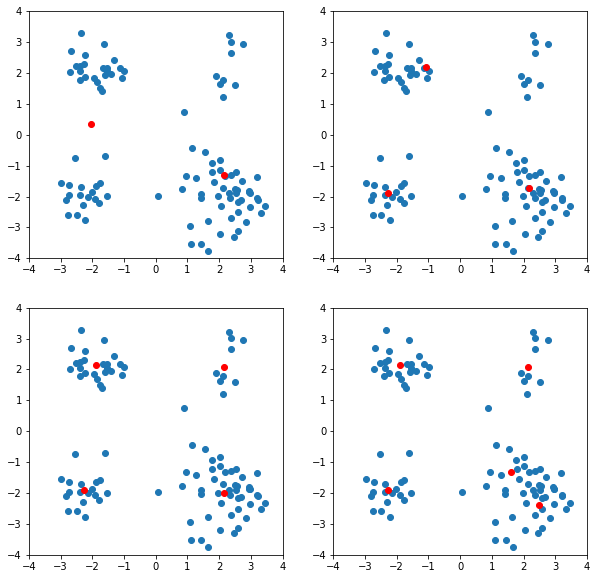

In [24]:
# Use kmeans_plusplus(xs_cluster_test, K, random_state=0) for initialization
n_iter = 5
fig = plt.figure(figsize=(10, 10))

i = 1
for k in [2,3,4,5]:
    init_centers, indices = kmeans_plusplus(xs_cluster_test, k, random_state=0)
    data = my_kmeans(xs_cluster_test, init_centers, n_iter)
    plt.subplot(2, 2, i)
    plt.scatter(xs_cluster_test[:,0],xs_cluster_test[:,1])
    plt.scatter(data[:,0], data[:,1], color="red")
    plt.xlim(-4,4)
    plt.ylim(-4,4)
    i=i+1
plt.show



## Radial Basis Function Network
__Task C.1__ Find $K=100$ cluster centers using $K$-Means.

In [25]:
# This 100x21 numpy array should contain the cluster centers
kmeans = KMeans(n_clusters=100, init='k-means++', random_state=0).fit(xs_train_std)
xs_centers = kmeans.cluster_centers_  # location of newly created centerpoints
labels = kmeans.labels_ # labels each trainings dataset point regarding it's center

__Task C.2__ Implement the Gaussian basis functions and transform the data accordingly

In [26]:
# xs_train_gauss = 
def gaussianBasisFunction(sigmaSquared, r):
    return (1/(math.sqrt(2*math.pi*sigmaSquared)))*math.exp((-math.pow(r,2))/(2*sigmaSquared))


def twoNormDistance(x, y): 
    return np.linalg.norm(np.subtract(x, y), ord=2, axis=None, keepdims=False)

def transform(dataPoints, centers, numberOfCenters):
    transformedPoints = np.zeros([dataPoints[:,0].size, numberOfCenters])
    # Transform inputs:
    for i in range(dataPoints[:,0].size): # loop through all datapoints
        for k in range(numberOfCenters): # loop through all center points 
            transformedPoints[i, k] = gaussianBasisFunction(25**2, twoNormDistance(dataPoints[i,:], centers[k,:]))
    return transformedPoints

xs_train_gauss = transform(xs_train_std, xs_centers, 100)
xs_valid_gauss = transform(xs_valid_std, xs_centers, 100)
xs_test_gauss = transform(xs_test_std, xs_centers, 100)

# Append ones to enable bias
ones_train = np.ones((xs_train_std[:,1].size, 1))
xs_train_gauss = np.hstack((xs_train_gauss,ones_train))
ones_valid = np.ones((xs_valid_std[:,1].size, 1))
xs_valid_gauss = np.hstack((xs_valid_gauss,ones_valid))
ones_test = np.ones((xs_test_std[:,1].size, 1))
xs_test_gauss = np.hstack((xs_test_gauss,ones_test))

__Task C.3__ Run simple linear regression on the transformed data and evaluate it on the test set

In [27]:
# This should contain the resulting predictions on the validation data set
# ys_pred_gauss_valid = 

# Learn linear regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(xs_train_gauss, ys_train_std)


ys_pred_gauss_train = reg.predict(xs_train_gauss)
ys_pred_gauss_valid = reg.predict(xs_valid_gauss)
ys_pred_gauss_test = reg.predict(xs_test_gauss)

# This should contain the corresponding SMSE
# smse_gauss = 
smse_gauss = my_smse(ys_pred_gauss_valid, ys_valid_std, np.var(ys_valid_std))
print(smse_gauss)

0.04170624732115517


__Open task__ Can you improve the performance of the RBF network?

In [28]:
smse_gauss_valid = smse_gauss
smse_gauss_train = my_smse(ys_pred_gauss_train, ys_train_std, np.var(ys_train_std))
smse_gauss_test = my_smse(ys_pred_gauss_test, ys_test_std, np.var(ys_test_std))

print(smse_gauss_train)
print(smse_gauss_valid)
print(smse_gauss_test)
print("-> No overfitting. Try higher complexity.")

0.04360050758128406
0.04170624732115517
0.04251767712245977
-> No overfitting. Try higher complexity.


In [29]:
# Find 500 centers
kmeansBetter = KMeans(n_clusters=500, init='k-means++', random_state=0).fit(xs_train_std)
xs_centersBetter = kmeansBetter.cluster_centers_  # location of newly created centerpoints
labelsBetter = kmeansBetter.labels_ # labels each trainings dataset point regarding it's center

xs_train_gaussBetter = transform(xs_train_std, xs_centersBetter, 500)
xs_valid_gaussBetter = transform(xs_valid_std, xs_centersBetter, 500)
xs_test_gaussBetter = transform(xs_test_std, xs_centersBetter, 500)
# Append ones to enable bias
ones_trainBetter = np.ones((xs_train_std[:,1].size, 1))
xs_train_gaussBetter = np.hstack((xs_train_gaussBetter,ones_trainBetter))
ones_validBetter = np.ones((xs_valid_std[:,1].size, 1))
xs_valid_gaussBetter = np.hstack((xs_valid_gaussBetter,ones_validBetter))
ones_testBetter = np.ones((xs_test_std[:,1].size, 1))
xs_test_gaussBetter = np.hstack((xs_test_gaussBetter,ones_testBetter))

In [32]:
# Learn linear regression
from sklearn.linear_model import LinearRegression
regBetter = LinearRegression().fit(xs_train_gaussBetter, ys_train_std)


ys_pred_gauss_trainBetter = regBetter.predict(xs_train_gaussBetter)
ys_pred_gauss_validBetter = regBetter.predict(xs_valid_gaussBetter)


smse_gauss_validBetter = my_smse(ys_pred_gauss_trainBetter, ys_train_std, np.var(ys_train_std))
smse_gauss_trainBetter = my_smse(ys_pred_gauss_validBetter, ys_valid_std, np.var(ys_valid_std))
smse_gauss_testBetter = my_smse(ys_pred_gauss_testBetter, ys_test_std, np.var(ys_test_std))

print(smse_gauss_trainBetter)
print(smse_gauss_validBetter)
print("Better regression than before. I could probably further increase complexity without overfitting, but my Laptop is slow.")

0.025944893306203247
0.026605373075268356
Better regression than before. I could probably further increase complexity without overfitting, but my Laptop is slow.


__Task C.4__ Evaluate your final model (either the one from Task C.3 or your improved model from the open task) on the test data

In [31]:
# This should contain the predictions on the test data set
# ys_pred_test = 
ys_pred_gauss_testBetter = regBetter.predict(xs_test_gaussBetter)
ys_pred_test = ys_pred_gauss_test
# This should contain the resulting SMSE on the test data
# smse_test = 
smse_gauss_testBetter = my_smse(ys_pred_gauss_testBetter, ys_test_std, np.var(ys_test_std))

smse_test = smse_gauss_testBetter

print(smse_test)

0.026072530882785203
